## Tutorial 7: Genetic Programming

The aim is to maximize the equation:
    
    y = w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w6*x6
    
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    
    What are the best values for the 6 weights w1 to w6?
    
    We are going to use the genetic algorithm for the best possible values after a number of generations.

In [3]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the member
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover


In [4]:


# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
    
"""
sol_per_pop = 32
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) 
print(pop_size)
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)



(32, 6)
[[ 0.21132729  2.32202967 -3.18727896 -2.26893855 -2.13896768  2.31413524]
 [-2.26728807 -0.13166786 -1.90740924 -1.57983437 -3.35472227 -3.29615376]
 [-3.41847062 -2.98980966 -3.66712629  2.26246423 -0.85621662 -0.21418073]
 [-2.53101654  1.10303398  0.82739727 -3.27780766  0.8616078  -1.67050192]
 [-2.47370626 -0.52496679  1.05019133 -3.84872818 -1.48025782  0.97570756]
 [ 1.86286363  3.94883447  0.38891817 -3.00070427 -0.93540376  0.69724089]
 [ 0.54399878  2.60040686  2.91167889  2.03772094 -3.57765206 -1.00551711]
 [ 3.59224273  1.82749064  2.37065466  0.99354751  1.87691691 -1.34544159]
 [ 0.1527381   1.71813012  3.69612874 -0.97344291 -1.25045269 -3.24239413]
 [ 2.296973   -3.91894753 -3.81454598 -2.7391155  -2.29111252  1.21909339]
 [-3.88366185 -2.40205963 -0.7301377   1.67250464  2.5474776   1.65027859]
 [ 3.16222148  0.43207511  2.77749911  3.44629348  2.71802137  3.02460129]
 [ 3.99399625  3.41848117  0.22945184  3.60485271 -2.05986288  3.38867006]
 [-0.71938842  2.

Generation :  0
Fitness
[-13.64671038  29.01294685   1.20814817 -27.44960874 -12.71585226
  -7.07611301  61.43476531   9.65650793  34.23816015   9.45179743
 -40.70204985  -5.37641112  34.69811011 -34.99660693 -24.02714216
 -19.03691221  14.58006309  25.01040028   5.83684008 -21.04715618
  50.35489359  10.57961526   6.37152547   5.47512253  -1.87769371
   6.87625828  45.78350997   2.18269693  27.10094968  35.93540471
  42.81024599 -58.06534343]
Best result :  61.43476530763095
Parents
[[ 0.54399878  2.60040686  2.91167889  2.03772094 -3.57765206 -1.00551711]
 [ 3.99340021 -0.56295814 -3.70882714  0.89711346 -3.10127258 -1.62483102]
 [ 1.02178215 -3.89082675 -1.5136468   2.50047088 -1.22044815 -2.82663992]
 [-0.56525325 -0.05269444  1.35092577  1.15270135 -1.90304441 -2.88098608]]
Crossover
[[ 0.54399878  2.60040686  2.91167889  0.89711346 -3.10127258 -1.62483102]
 [ 3.99340021 -0.56295814 -3.70882714  2.50047088 -1.22044815 -2.82663992]
 [ 1.02178215 -3.89082675 -1.5136468   1.15270135 

/var/folders/d_/y_gtn4hn6px65096zwc9qrnr0000gp/T/ipykernel_2986/1872794021.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value


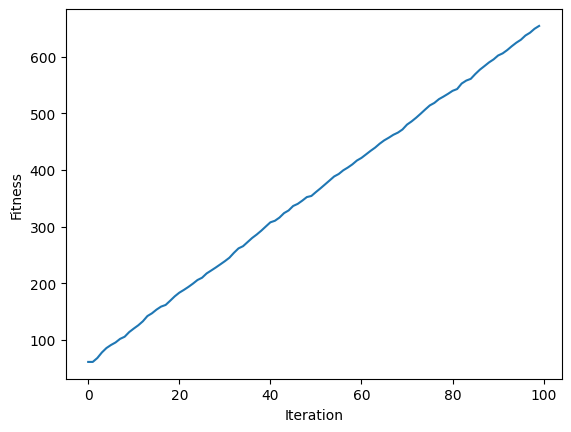

In [5]:
best_outputs = []
num_generations = 100
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each member in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()